<a href="https://colab.research.google.com/github/omarashour04/Healthcare_Predictive_Analytics/blob/main/DEPI_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Data **Cleaning**

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/healthcare_dataset.csv')
# Display the first few rows of the dataset
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
#Initial assessment
print(f"Dataset shape: {df.shape}")
print("\nData types:\n", df.dtypes)
print("\nSample data:\n", df.head())

Dataset shape: (55500, 15)

Data types:
 Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

Sample data:
             Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   


In [ ]:
# Convert date columns to datetime
date_cols = ['Date of Admission', 'Discharge Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert categorical columns to category type
cat_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital',
            'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
# Check for missing values
print("Missing values :\n", df.isnull().sum())

Missing values :
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [ ]:
# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 534


In [ ]:
# Remove duplicates keeping the first occurrence
df.drop_duplicates(inplace=True)

In [ ]:
#Normalization

#Select numerical columns for normalization
numerical_cols = ['Billing Amount']

# Apply Min-Max normalization
for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col + '_normalized'] = (df[col] - min_val) / (max_val - min_val)

print(df.head())


            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

2) Visualizations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

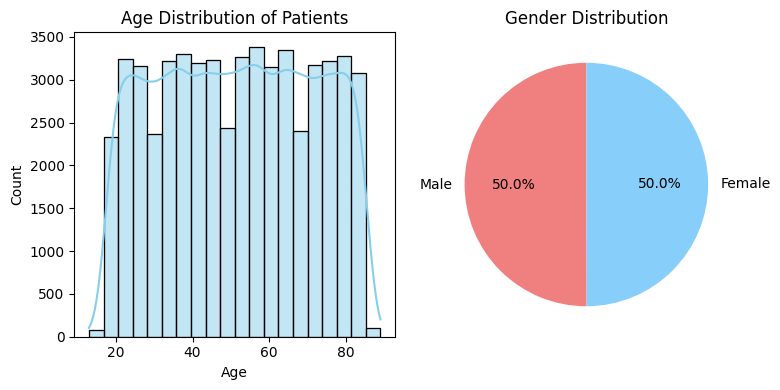

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', ax=ax1)
ax1.set_title('Age Distribution of Patients')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

# Gender distribution
gender_counts = df['Gender'].value_counts()
ax2.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['lightcoral', 'lightskyblue'], startangle=90)
ax2.set_title('Gender Distribution')

plt.tight_layout()
plt.show()


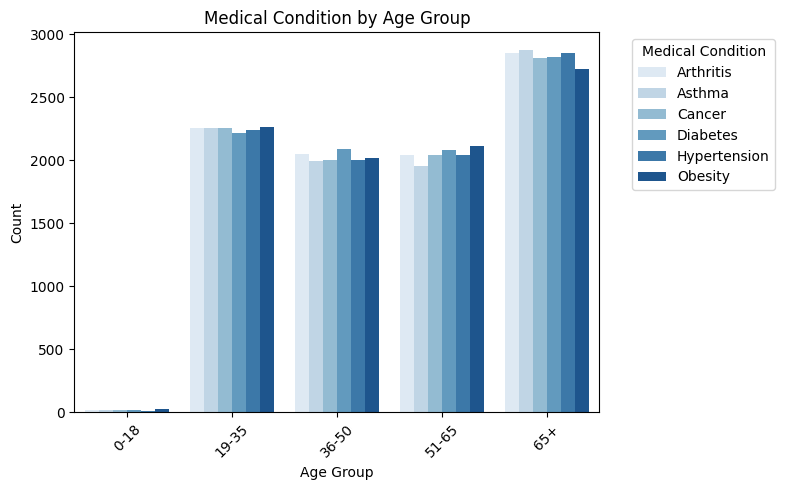

<ipython-input-123-e71be257754b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Admission Month', data=df, order=month_order, palette='Blues')


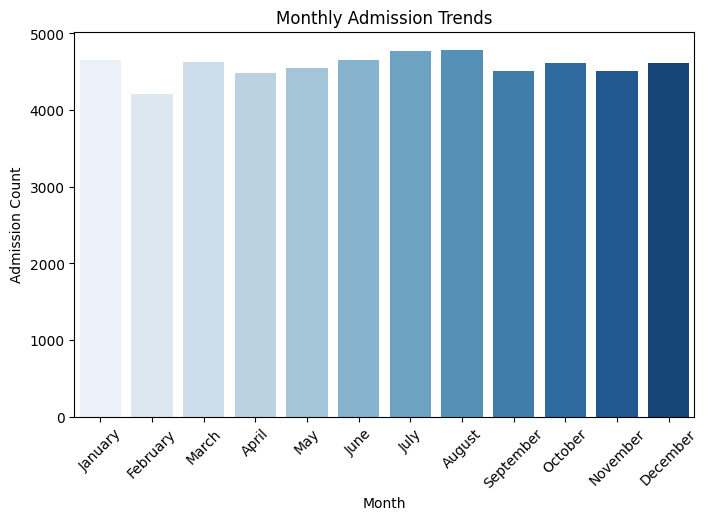

In [ ]:
# Age groups
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Medical condition by age group
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', hue='Medical Condition', data=df, palette='Blues')
plt.title('Medical Condition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Monthly admission trends
df['Admission Month'] = df['Date of Admission'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(8, 5))
sns.countplot(x='Admission Month', data=df, order=month_order, palette='Blues')
plt.title('Monthly Admission Trends')
plt.xlabel('Month')
plt.ylabel('Admission Count')
plt.xticks(rotation=45)
plt.show()
